<a href="https://colab.research.google.com/github/laidouniyoussef/AuthFlutter/blob/master/GARBAGE_Classificator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)


Mounted at /content/drive


In [ ]:
train_path = '/content/drive/MyDrive/*FOLERNAME*/TRAIN'


In [ ]:
test_path='/content/drive/MyDrive/*FOLERNAME*/TEST'


In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D,Dense,Dropout
from tensorflow.keras.models  import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
#paths to the train, validation and test image datasets
train_path = '/content/drive/MyDrive/*FOLERNAME*/TRAIN'
valid_path = '/content/drive/MyDrive/*FOLERNAME*/TRAIN'


# extract images to training set by applying data preprocessing and data augmentation
train_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.1).flow_from_directory(
    directory=train_path, target_size=(224,224), classes=['cardboard', 'glass', 'metal',
                                                         'paper', 'plastic', 'trash'], batch_size=16)#subset='training')


# extract images to validation set
valid_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
    validation_split=0.1).flow_from_directory(
    directory=valid_path, target_size=(224,224), classes=['cardboard', 'glass', 'metal',
                                                         'paper', 'plastic', 'trash'], batch_size=16)#, subset='validation'


Found 2001 images belonging to 6 classes.
Found 2001 images belonging to 6 classes.


In [ ]:
import matplotlib.pyplot as plt
def plot_imgs(item_dir, top=10):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:5]

    plt.figure(figsize=(10, 10))

    for idx, img_path in enumerate(item_files):
        plt.subplot(5, 5, idx+1)

        img = plt.imread(img_path)
        plt.tight_layout()
        plt.imshow(img, cmap='gray')


In [ ]:
import os
print(os.listdir('/content/drive/MyDrive/*FOLERNAME*/TRAIN'))


['metal', 'trash', 'plastic', 'paper', 'cardboard', 'glass']


In [ ]:
data_path = '/content/drive/MyDrive/*FOLERNAME*/TRAIN'


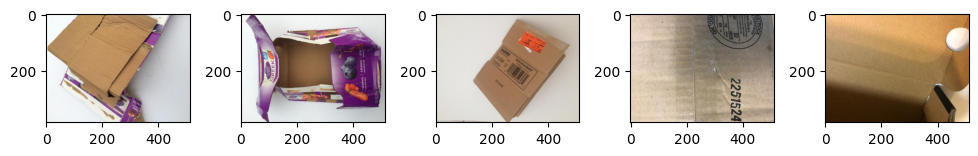

In [ ]:
plot_imgs(data_path+'/cardboard')


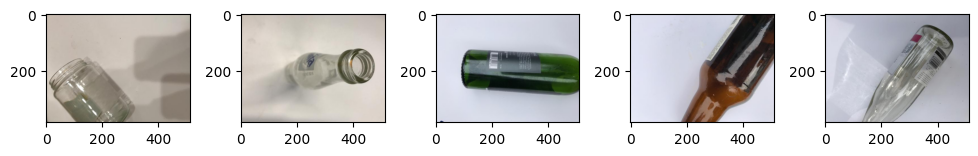

In [ ]:
plot_imgs(data_path+'/glass')

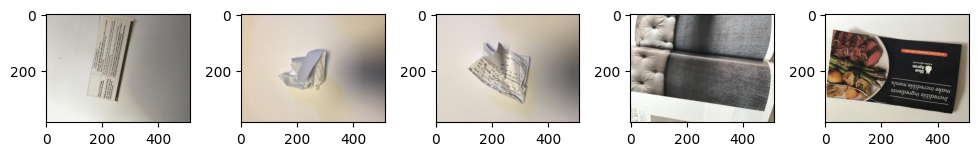

In [ ]:
plot_imgs(data_path+'/paper')

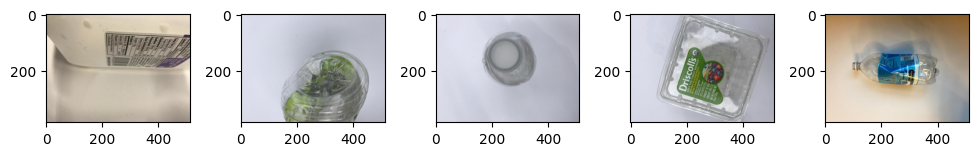

In [ ]:
plot_imgs(data_path+'/plastic')

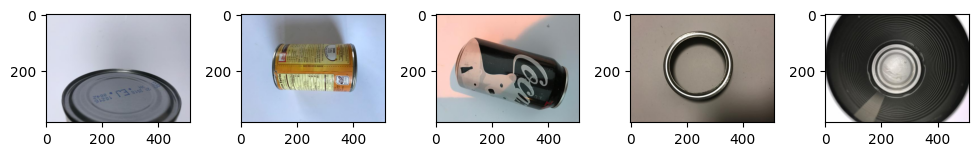

In [ ]:
plot_imgs(data_path+'/metal')

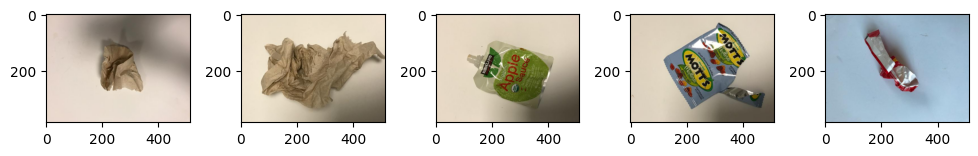

In [ ]:
plot_imgs(data_path+'/trash')

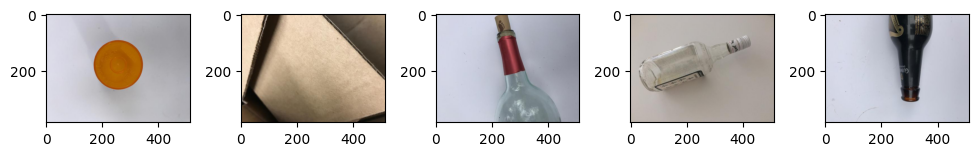

In [ ]:
batch_size = 32
plot_imgs(test_path)

In [ ]:
# Data Generator
train=ImageDataGenerator(horizontal_flip=True, vertical_flip=True,validation_split=0.1,rescale=1./255,
                         shear_range = 0.1,zoom_range = 0.1,
                         width_shift_range = 0.1,
                         height_shift_range = 0.1,)

test=ImageDataGenerator(rescale=1./255,validation_split=0.1)

train_generator=train.flow_from_directory(data_path,target_size=(128,128),batch_size=batch_size,class_mode='categorical')#,subset='training')
test_generator=test.flow_from_directory(data_path,target_size=(128,128),batch_size=batch_size,class_mode='categorical')#,subset='validation')

Found 2001 images belonging to 6 classes.
Found 2001 images belonging to 6 classes.


In [ ]:

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
print(labels)


{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [ ]:
num_classes = 6

In [ ]:
# Build Model
model = Sequential()

model.add(Conv2D(32,(3,3), padding='same', input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 32)        0

In [ ]:

# Compile Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:

model_path="garbage_cnn.h5"
checkpoint1 = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint1]


In [ ]:
num_epochs = 200
step_size_train=train_generator.n//train_generator.batch_size
step_size_test =test_generator.n//test_generator.batch_size


In [ ]:
# Train Model
history = model.fit(train_generator, epochs=num_epochs, steps_per_epoch=step_size_train,validation_data=test_generator,
                    callbacks=callbacks_list)


Epoch 1/200
62/62 [==============================] - ETA: 0s - loss: 1.7193 - accuracy: 0.2372 
Epoch 1: val_accuracy improved from -inf to 0.26587, saving model to garbage_cnn.h5
62/62 [==============================] - 1135s 18s/step - loss: 1.7193 - accuracy: 0.2372 - val_loss: 1.5645 - val_accuracy: 0.2659
Epoch 2/200


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


62/62 [==============================] - ETA: 0s - loss: 1.5949 - accuracy: 0.3118
Epoch 2: val_accuracy improved from 0.26587 to 0.37631, saving model to garbage_cnn.h5
62/62 [==============================] - 20s 324ms/step - loss: 1.5949 - accuracy: 0.3118 - val_loss: 1.4552 - val_accuracy: 0.3763
Epoch 3/200
62/62 [==============================] - ETA: 0s - loss: 1.5109 - accuracy: 0.3469
Epoch 3: val_accuracy improved from 0.37631 to 0.42029, saving model to garbage_cnn.h5
62/62 [==============================] - 20s 327ms/step - loss: 1.5109 - accuracy: 0.3469 - val_loss: 1.3599 - val_accuracy: 0.4203
Epoch 4/200
62/62 [==============================] - ETA: 0s - loss: 1.4528 - accuracy: 0.3840
Epoch 4: val_accuracy improved from 0.42029 to 0.44528, saving model to garbage_cnn.h5
62/62 [==============================] - 20s 317ms/step - loss: 1.4528 - accuracy: 0.3840 - val_loss: 1.2966 - val_accuracy: 0.4453
Epoch 5/200
62/62 [==============================] - ETA: 0s - loss: 1

In [ ]:
# Evaluate Model
score = model.evaluate_generator(test_generator, steps=step_size_test)
print(score)

<ipython-input-20-46b426b9d1f9>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(test_generator, steps=step_size_test)


[0.165276437997818, 0.9435483813285828]


In [ ]:
from keras.models import load_model
import numpy as np
import os
import cv2
import csv

model = load_model('garbage_cnn.h5')  # Assurez-vous que le modèle est correctement chargé
classes=['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

score = model.evaluate_generator(test_generator, steps=step_size_test)
print(score)

def preprocess_image(image_path):
    # Chargez l'image, convertissez-la en RVB et redimensionnez-la
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (128, 128))  # Assurez-vous que la taille correspond à celle de votre modèle
    image = image / 255.0  # Normalisation
    return image


test_path='/content/drive/MyDrive/*FOLERNAME*/TEST'

test_image_paths = [os.path.join(test_path, image) for image in os.listdir(test_path)]




<ipython-input-21-f58709d3b8cb>:10: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(test_generator, steps=step_size_test)


[0.12598441541194916, 0.9621976017951965]


In [ ]:
results = []

for image_path in sorted(test_image_paths):
    # Prétraitez l'image
    processed_image = preprocess_image(image_path)

    # Redimensionnez l'image pour la prédiction (1, 224, 224, 3)
    input_image = np.expand_dims(processed_image, axis=0)

    # Faites la prédiction avec le modèle
    prediction = model.predict(input_image)

    # Obtenez la classe prédite
    predicted_class = classes[np.argmax(prediction)]

      # Obtenez le nom du fichier
    filename = os.path.basename(image_path)

    # Ajoutez le résultat à la liste
    results.append([filename, predicted_class])

output_csv = 'results.csv'



1/1 [==============================] - 0s 17ms/step


In [ ]:
with open(output_csv, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    # Écrire l'en-tête (noms des colonnes)
    csvwriter.writerow(['Filename', 'Label'])
    # Écrire les résultats
    csvwriter.writerows(results)

print(f"Les résultats ont été enregistrés dans {output_csv}.")

Les résultats ont été enregistrés dans results.csv.


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


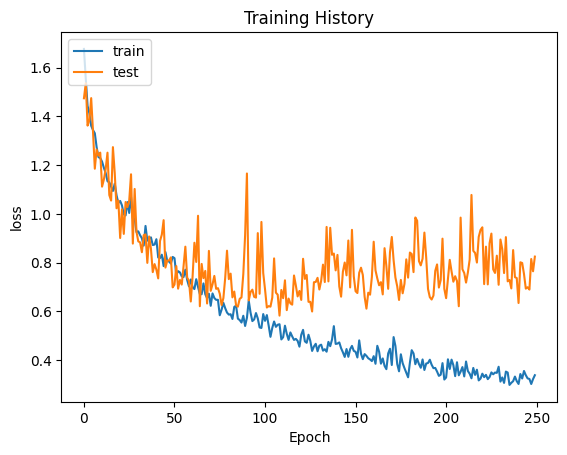

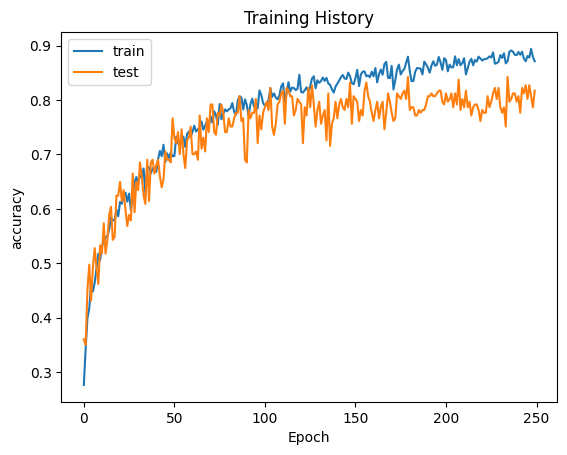

In [ ]:
# Show Train History
keys=history.history.keys()
print(keys)

def show_train_history(hisData,train,test):
    plt.plot(hisData.history[train])
    plt.plot(hisData.history[test])
    plt.title('Training History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

show_train_history(history, 'loss', 'val_loss')
show_train_history(history, 'accuracy', 'val_accuracy')
